In [1]:
import pandas as pd
import numpy as np
import random
import math
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
file=r'C:/Data/Datasets/Data/counterfeit_train.csv'
file1=r'C:/Data/Datasets/Data/counterfeit_test.csv'
ld_train=pd.read_csv(file)
ld_test=pd.read_csv(file1)

In [3]:
ld_train.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [4]:
ld_test.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small


In [5]:
print(ld_train.shape,ld_test.shape)

(6818, 12) (1705, 11)


In [6]:
ld_test['Counterfeit_Sales']=np.nan

In [7]:
ld_train['data']='train'
ld_test['data']='test'

In [8]:
 #In order to make columns arrangement similar for proper concatenation.
ld_test=ld_test[ld_train.columns]

In [9]:
ld_all=pd.concat([ld_train,ld_test], axis=0)

In [10]:
ld_all.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026,train
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520,train
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920,train
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130,train
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402,train


In [11]:
ld_all.tail()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales,data
1700,KXW10,NaN,Area027,1983,136.5704,Hreplacements,mild,0.050505,CityLimits,Tier 3,Medium,NaN,test
1701,CKE54,21.30,Area035,2002,57.0744,Antibiotics,critical,0.041118,DownTown,Tier 2,Small,NaN,test
1702,HAY13,20.40,Area017,2005,182.7422,Antiseptics,mild,0.191273,DownTown,Tier 2,Unknown,NaN,test
1703,ZEE32,20.00,Area018,2007,266.9672,Hreplacements,mild,0.013000,Industrial,Tier 3,Medium,NaN,test
1704,NDL93,8.08,Area045,2000,238.7694,Antibiotics,critical,0.098982,DownTown,Tier 2,Unknown,NaN,test


In [12]:
ld_all.dtypes

Medicine_ID             object
Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
Counterfeit_Sales      float64
data                    object
dtype: object

In [13]:
ld_all['Medicine_Type'].value_counts(ascending=False)

Antibiotics           1232
Hreplacements         1200
Antiseptics            910
OralContraceptives     856
Antipyretics           682
Cardiac                649
Mstablizers            648
Tranquilizers          520
Analgesics             445
Antimalarial           425
Antacids               251
Statins                214
MuscleRelaxants        169
Antifungal             148
Stimulants             110
Antiviral               64
Name: Medicine_Type, dtype: int64

In [14]:
ld_all['SidEffect_Level'].value_counts(ascending=False)

mild        5517
critical    3006
Name: SidEffect_Level, dtype: int64

In [15]:
ld_all['Area_Type'].value_counts(ascending=False)

DownTown              5577
MidTownResidential    1083
CityLimits             935
Industrial             928
Name: Area_Type, dtype: int64

In [16]:
ld_all['Area_City_Type'].value_counts(ascending=False)

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Area_City_Type, dtype: int64

In [17]:
ld_all['Area_dist_level'].value_counts(ascending=False)

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Area_dist_level, dtype: int64

In [18]:
for col in ld_all.columns:
    print(col,":",ld_all[col].isnull().sum())

Medicine_ID : 0
Counterfeit_Weight : 1463
DistArea_ID : 0
Active_Since : 0
Medicine_MRP : 0
Medicine_Type : 0
SidEffect_Level : 0
Availability_rating : 0
Area_Type : 0
Area_City_Type : 0
Area_dist_level : 0
Counterfeit_Sales : 1705
data : 0


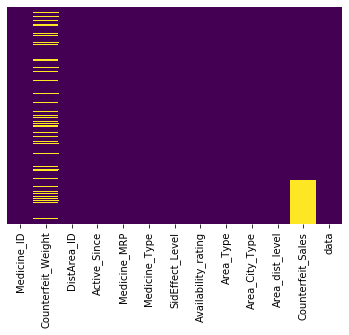

In [19]:
sns.heatmap(ld_all.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [20]:
for col in ld_all.columns:
    if (col not in ['Counterfeit_Sales', 'data']) & (ld_all[col].isnull().sum()>0):
        ld_all.loc[ld_all[col].isnull(),col]= ld_all.loc[ld_all['data']=='train', col].mean()    

In [21]:
for col in ld_all.columns:
    print(col,":",ld_all[col].isnull().sum())

Medicine_ID : 0
Counterfeit_Weight : 0
DistArea_ID : 0
Active_Since : 0
Medicine_MRP : 0
Medicine_Type : 0
SidEffect_Level : 0
Availability_rating : 0
Area_Type : 0
Area_City_Type : 0
Area_dist_level : 0
Counterfeit_Sales : 1705
data : 0


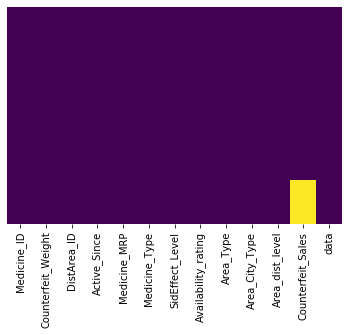

In [22]:
sns.heatmap(ld_all.isnull(), yticklabels=False, cbar=False, cmap='viridis')

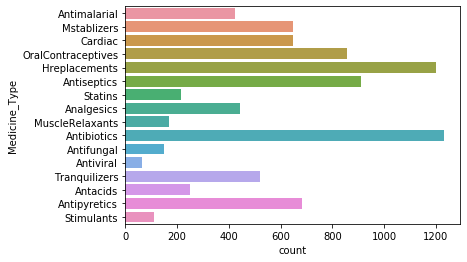

In [23]:
sns.countplot(y='Medicine_Type', data=ld_all)

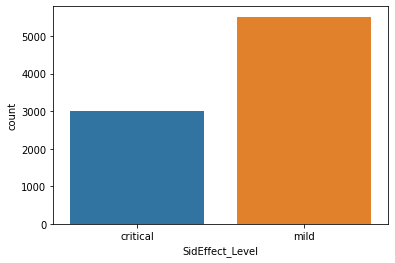

In [24]:
sns.countplot(x='SidEffect_Level', data=ld_all)

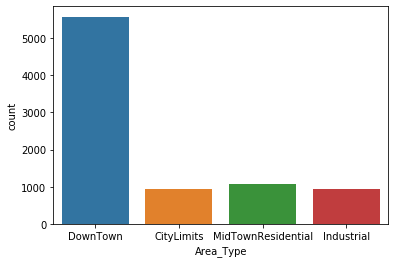

In [25]:
sns.countplot(x='Area_Type', data=ld_all)

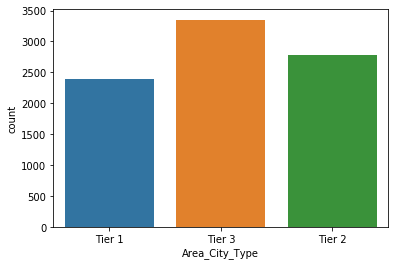

In [26]:
sns.countplot(x='Area_City_Type', data=ld_all)

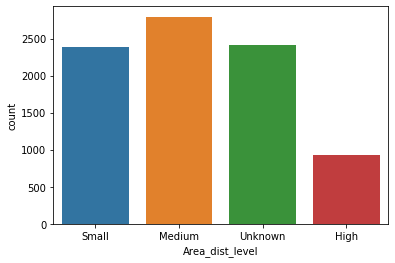

In [27]:
sns.countplot(x='Area_dist_level', data=ld_all)

In [28]:
ld_all.corr()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
Counterfeit_Weight,1.000000,-0.005649,0.024789,-0.012399,0.004882
Active_Since,-0.005649,1.000000,0.005020,-0.074834,-0.039595
Medicine_MRP,0.024789,0.005020,1.000000,-0.001315,0.573684
Availability_rating,-0.012399,-0.074834,-0.001315,1.000000,-0.124058
Counterfeit_Sales,0.004882,-0.039595,0.573684,-0.124058,1.000000


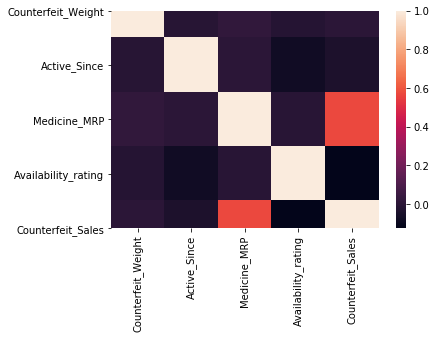

In [29]:
sns.heatmap(ld_all.corr())

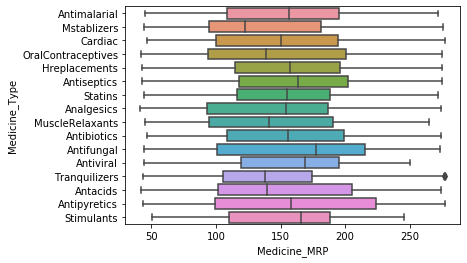

In [30]:
sns.boxplot(y='Medicine_Type',x='Medicine_MRP', data=ld_all)

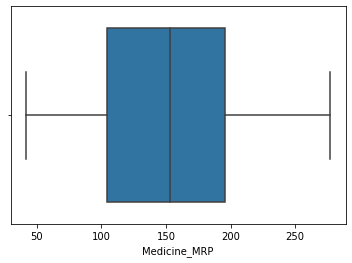

In [31]:
sns.boxplot(x='Medicine_MRP', data=ld_all)

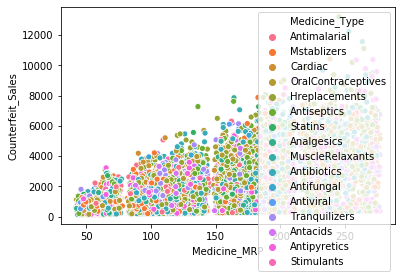

In [32]:
sns.scatterplot(x='Medicine_MRP', y='Counterfeit_Sales', data=ld_all, hue='Medicine_Type')

In [33]:
ld_all.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales', 'data'],
      dtype='object')

In [34]:
ld_all.drop(['Medicine_ID', 'DistArea_ID'], axis=1, inplace=True)

In [35]:
ld_all.columns

Index(['Counterfeit_Weight', 'Active_Since', 'Medicine_MRP', 'Medicine_Type',
       'SidEffect_Level', 'Availability_rating', 'Area_Type', 'Area_City_Type',
       'Area_dist_level', 'Counterfeit_Sales', 'data'],
      dtype='object')

In [36]:
ld_all['Area_Type'].value_counts(ascending=False)

DownTown              5577
MidTownResidential    1083
CityLimits             935
Industrial             928
Name: Area_Type, dtype: int64

In [37]:
top_3=[x for x in ld_all['Area_Type'].value_counts(ascending=False).head(3).index]
top_3

['DownTown', 'MidTownResidential', 'CityLimits']

In [38]:
def one_hot_method(df, variable, top_labels):
    for labels in top_labels:
        df[variable+'_'+labels]=np.where(df[variable]==labels,1,0)

In [39]:
one_hot_method(ld_all, 'Area_Type', top_3)

In [40]:
ld_all['SidEffect_Level'].value_counts(ascending=False)

mild        5517
critical    3006
Name: SidEffect_Level, dtype: int64

In [41]:
dummy=pd.get_dummies(ld_all['SidEffect_Level'], drop_first=True, prefix='sideffect_')
dummy.head()

,sideffect__mild
0,0
1,1
2,1
3,1
4,0


In [42]:
ld_all=pd.concat([ld_all, dummy], axis=1)

In [43]:
ld_all.drop(['SidEffect_Level'], axis=1, inplace=True)

In [44]:
ld_all.columns

Index(['Counterfeit_Weight', 'Active_Since', 'Medicine_MRP', 'Medicine_Type',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales', 'data', 'Area_Type_DownTown',
       'Area_Type_MidTownResidential', 'Area_Type_CityLimits',
       'sideffect__mild'],
      dtype='object')

In [45]:
ld_all.drop(['Area_Type'], axis=1, inplace=True)

In [46]:
ld_all.dtypes

Counterfeit_Weight              float64
Active_Since                      int64
Medicine_MRP                    float64
Medicine_Type                    object
Availability_rating             float64
Area_City_Type                   object
Area_dist_level                  object
Counterfeit_Sales               float64
data                             object
Area_Type_DownTown                int32
Area_Type_MidTownResidential      int32
Area_Type_CityLimits              int32
sideffect__mild                   uint8
dtype: object

In [47]:
#def dummmies (x, df):
    #temp=pd.get_dummies(df[x], drop_first=True)
    #df=pd.concat([df, temp], axis=1)
    #df.drop([x], axis=1, inplace=True)
    #return df

In [48]:
ld_all['Area_dist_level'].value_counts(ascending=False)

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Area_dist_level, dtype: int64

In [49]:
top_3=[x for x in ld_all['Area_dist_level'].value_counts(ascending=False).head(3).index]
top_3

['Medium', 'Unknown', 'Small']

In [50]:
def one_hot_method(df, variable, top_labels):
    for labels in top_labels:
        df[variable+'_'+labels]=np.where(df[variable]==labels,1,0)
one_hot_method(ld_all, 'Area_dist_level', top_3)

In [51]:
ld_all.drop(['Area_dist_level'], axis=1, inplace=True)

In [52]:
ld_all['Area_City_Type'].value_counts(ascending=True)

Tier 1    2388
Tier 2    2785
Tier 3    3350
Name: Area_City_Type, dtype: int64

In [53]:
dummy=pd.get_dummies(ld_all['Area_City_Type'], drop_first=True, prefix='area_city')
dummy.head()

,area_city_Tier 2,area_city_Tier 3
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0


In [54]:
ld_all=pd.concat([ld_all, dummy], axis=1)

In [55]:
ld_all.drop(['Area_City_Type'], axis=1, inplace=True)

In [56]:
ld_all.dtypes

Counterfeit_Weight              float64
Active_Since                      int64
Medicine_MRP                    float64
Medicine_Type                    object
Availability_rating             float64
Counterfeit_Sales               float64
data                             object
Area_Type_DownTown                int32
Area_Type_MidTownResidential      int32
Area_Type_CityLimits              int32
sideffect__mild                   uint8
Area_dist_level_Medium            int32
Area_dist_level_Unknown           int32
Area_dist_level_Small             int32
area_city_Tier 2                  uint8
area_city_Tier 3                  uint8
dtype: object

In [57]:
ld_all['Medicine_Type'].value_counts(ascending=False)

Antibiotics           1232
Hreplacements         1200
Antiseptics            910
OralContraceptives     856
Antipyretics           682
Cardiac                649
Mstablizers            648
Tranquilizers          520
Analgesics             445
Antimalarial           425
Antacids               251
Statins                214
MuscleRelaxants        169
Antifungal             148
Stimulants             110
Antiviral               64
Name: Medicine_Type, dtype: int64

In [58]:
top_4=[x for x in ld_all['Medicine_Type'].value_counts(ascending=False).head(4).index]
top_4

['Antibiotics', 'Hreplacements', 'Antiseptics', 'OralContraceptives']

In [59]:

def one_hot_method(df, variable, top_labels):
    for labels in top_labels:
        df[variable+'_'+labels]=np.where(df[variable]==labels,1,0)
one_hot_method(ld_all, 'Medicine_Type', top_4)

In [60]:
ld_all.drop(['Medicine_Type'], axis=1, inplace=True)

In [61]:
ld_all.dtypes

Counterfeit_Weight                  float64
Active_Since                          int64
Medicine_MRP                        float64
Availability_rating                 float64
Counterfeit_Sales                   float64
data                                 object
Area_Type_DownTown                    int32
Area_Type_MidTownResidential          int32
Area_Type_CityLimits                  int32
sideffect__mild                       uint8
Area_dist_level_Medium                int32
Area_dist_level_Unknown               int32
Area_dist_level_Small                 int32
area_city_Tier 2                      uint8
area_city_Tier 3                      uint8
Medicine_Type_Antibiotics             int32
Medicine_Type_Hreplacements           int32
Medicine_Type_Antiseptics             int32
Medicine_Type_OralContraceptives      int32
dtype: object

In [62]:
train_data_p = ld_all[ld_all['data'] == 'train']
test_data_p  = ld_all[ld_all['data'] == 'test']

In [63]:
del train_data_p['data']
del test_data_p['data']
del test_data_p['Counterfeit_Sales']

In [64]:
train_feature=train_data_p.drop(['Counterfeit_Sales'], axis=1)
train_target=train_data_p['Counterfeit_Sales']

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test,y_train, y_test= train_test_split(train_feature,train_target,test_size=0.2, random_state=100)

In [67]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5454, 17) (1364, 17) (5454,) (1364,)


In [68]:
#x_train1 = x_train.drop('Counterfeit_Sales', axis=1)
#x_train2 = x_train['Counterfeit_Sales']
#y_train1 = y_train.drop('Counterfeit_Sales', axis=1)
#y_train2 = y_train['Counterfeit_Sales']

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lr=LinearRegression()

In [71]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
lr.intercept_

-63633.36928129119

In [73]:
list(zip(X_train.columns, lr.coef_))

[('Counterfeit_Weight', -5.500394883223755),
 ('Active_Since', 32.104637632674354),
 ('Medicine_MRP', 15.599807963935145),
 ('Availability_rating', -456.4519809758544),
 ('Area_Type_DownTown', 348.2481207308831),
 ('Area_Type_MidTownResidential', -1146.5644531077173),
 ('Area_Type_CityLimits', 2437.9390418407106),
 ('sideffect__mild', -37.42845583119214),
 ('Area_dist_level_Medium', -615.246940916582),
 ('Area_dist_level_Unknown', -738.9901387916025),
 ('Area_dist_level_Small', -628.8013376857865),
 ('area_city_Tier 2', -73.89586363220599),
 ('area_city_Tier 3', -321.5489206495148),
 ('Medicine_Type_Antibiotics', 100.66019783874725),
 ('Medicine_Type_Hreplacements', 29.844760329152155),
 ('Medicine_Type_Antiseptics', -1.0475873216708256),
 ('Medicine_Type_OralContraceptives', -19.137817069770392)]

In [74]:
#y_train1=y_train.drop(['Counterfeit_Sales'], axis=1)

In [74]:
predicted_values=lr.predict(X_test)
predicted_values

array([ 809.41178214, 3057.2538214 , 1723.68537329, ..., 3389.11211148,
       2724.56184663, 1336.72604409])

In [75]:
from sklearn.metrics import mean_absolute_error

In [76]:
mae=mean_absolute_error(y_test, predicted_values)
mae

826.1820153872686

In [77]:
#from sklearn.metrics import r2_score
#r2_score(y_train1,predicted_values)
1-(826.1820153872676/1660)

0.5022999907305616

################XGBoost#################

In [78]:
import xgboost as xg

In [79]:
from xgboost import XGBRegressor

In [80]:
xgb=xg.XGBRegressor(n_estimators=100, learning_rate=0.08,gamma=0, subsample=0.75,
                   colsample_bytree=1, max_depth=7)

In [81]:
xgb.fit(X_train,y_train)

C:\Users\Sachin\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:25:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [87]:
prediction=xgb.predict(X_test)
prediction

array([ 961.787 , 3256.9333, 1658.743 , ..., 2897.0674, 2571.0312,
        829.4645], dtype=float32)

In [88]:
from sklearn.metrics import mean_absolute_error

In [89]:
mean_absolute_error(y_test, prediction)

758.6690057930418

In [90]:
1-(758.6690057930418/1660)

0.5429704784379266

In [91]:
xg_train_x=train_data_p.drop(['Counterfeit_Sales'], axis=1)
xg_train_y=train_data_p['Counterfeit_Sales']

In [92]:
xgb.fit(xg_train_x, xg_train_y)

C:\Users\Sachin\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sachin\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[15:28:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [93]:
prediction_final_values=xgb.predict(test_data_p)
prediction_final_values

array([2427.9243, 3439.9827, 1566.5616, ..., 2856.147 , 2668.0046,
       3613.263 ], dtype=float32)

In [108]:
pd.DataFrame(prediction_final_values).to_csv('Project3xgb.csv', index=False)

In [109]:
pwd

'C:\\Users\\Sachin\\Downloads'